In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

# Importing data

In [2]:
df1=pd.read_csv('USVisaSlotsData_May2022.csv')
df2=pd.read_csv('USVisaSlotsData_Jun2022.csv')
df3=pd.read_csv('USVisaSlotsData_Jul2022.csv')
df4=pd.read_csv('USVisaSlotsData_Aug2022.csv')
dfList = [df1,df2,df3,df4]
df_raw = pd.concat(dfList)
df_raw.head()

,already_has_appointment,appointment_times,slot_dates,createdon,visa_type,slot_location,available_slots,user_id
0,no,"[['Time', 'Date', 'Available'], ['11:45', 'Mon...","['2022-07-11', '2022-07-12', '2022-08-30', '20...",5/31/22 23:57,F-1 (Regular),CHENNAI VAC,18,37315
1,no,"[['Time', 'Date', 'Available'], ['15:30', 'Sun...","['2022-06-12', '2022-07-08', '2022-07-10', '20...",5/31/22 23:57,F-1 (Regular),MUMBAI VAC,6,37415
2,no,"[['Time', 'Date', 'Available'], ['15:30', 'Sun...","['2022-06-12', '2022-07-08', '2022-07-10', '20...",5/31/22 23:52,F-1 (Regular),MUMBAI VAC,6,37415
3,no,[],[],5/31/22 23:51,F-1 (Regular),CHENNAI,0,33368
4,no,"[['Time', 'Date', 'Available'], ['15:00', 'Mon...","['2022-06-06', '2022-06-17', '2022-06-22', '20...",5/31/22 23:51,F-1 (Regular),CHENNAI VAC,6,33368


In [3]:
len(df_raw)

669619

# Cleaning

In [9]:
df = df_raw[(df_raw['visa_type']=='F-1 (Regular)') & ((df_raw['slot_location'].str.contains('VAC', na=True) == False))]

In [10]:
len(df)

301758

In [11]:
def one_or_zero(slot):
  if slot > 0:
    return 1
  else:
    return 0

In [12]:
df['slots_yes'] = df['available_slots'].apply(lambda x:one_or_zero(x))

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/1459174963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slots_yes'] = df['available_slots'].apply(lambda x:one_or_zero(x))


In [13]:
df['slots_yes'].value_counts()

0    231265
1     70493
Name: slots_yes, dtype: int64

In [14]:
def day_func(day):
    parsed_datetime = datetime.datetime.strptime(day, '%m/%d/%y %H:%M')
    formatted_date = parsed_datetime.strftime('%Y-%m-%d %H:%M')
    date_obj = datetime.datetime.strptime(formatted_date, '%Y-%m-%d %H:%M')
    s = date_obj.date()
    return s

In [15]:
df['createdon_cleaned'] = df['createdon'].apply(lambda x: day_func(x))

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/1280282338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdon_cleaned'] = df['createdon'].apply(lambda x: day_func(x))


In [16]:
def day_func(day):
    parsed_datetime = datetime.datetime.strptime(day, '%m/%d/%y %H:%M')
    formatted_date = parsed_datetime.strftime('%Y-%m-%d %H:%M')
    date_obj = datetime.datetime.strptime(formatted_date, '%Y-%m-%d %H:%M')
    s = date_obj.time()
    hour_of_day = s.strftime('%H')
    return hour_of_day

In [17]:
df['createdon_cleaned_hour'] = df['createdon'].apply(lambda x: day_func(x))
df['createdon_cleaned_hour']

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/1004521234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdon_cleaned_hour'] = df['createdon'].apply(lambda x: day_func(x))


3        23
5        23
6        23
7        23
10       23
         ..
73863    00
73864    00
73876    00
73877    00
73878    00
Name: createdon_cleaned_hour, Length: 301758, dtype: object

In [18]:
def day_func(day):
    parsed_datetime = datetime.datetime.strptime(day, '%m/%d/%y %H:%M')
    formatted_date = parsed_datetime.strftime('%Y-%m-%d %H:%M')
    date_obj = datetime.datetime.strptime(formatted_date, '%Y-%m-%d %H:%M')
    s = date_obj.date()
    Day_of_week = s.strftime('%A')
    return Day_of_week

In [19]:
df['createdon_cleaned_day'] = df['createdon'].apply(lambda x: day_func(x))
df['createdon_cleaned_day']

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/44199289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdon_cleaned_day'] = df['createdon'].apply(lambda x: day_func(x))


3        Tuesday
5        Tuesday
6        Tuesday
7        Tuesday
10       Tuesday
          ...   
73863     Monday
73864     Monday
73876     Monday
73877     Monday
73878     Monday
Name: createdon_cleaned_day, Length: 301758, dtype: object

In [20]:
df.head()

,already_has_appointment,appointment_times,slot_dates,createdon,visa_type,slot_location,available_slots,user_id,slots_yes,createdon_cleaned,createdon_cleaned_hour,createdon_cleaned_day
3,no,[],[],5/31/22 23:51,F-1 (Regular),CHENNAI,0,33368,0,2022-05-31,23,Tuesday
5,yes,[],[],5/31/22 23:50,F-1 (Regular),NEW DELHI,0,30999,0,2022-05-31,23,Tuesday
6,yes,[],[],5/31/22 23:50,F-1 (Regular),HYDERABAD,0,30999,0,2022-05-31,23,Tuesday
7,no,[],[],5/31/22 23:50,F-1 (Regular),NEW DELHI,0,31890,0,2022-05-31,23,Tuesday
10,no,[],[],5/31/22 23:49,F-1 (Regular),NEW DELHI,0,7137,0,2022-05-31,23,Tuesday


In [21]:
def day_func(week):
    parsed_datetime = datetime.datetime.strptime(week, '%m/%d/%y %H:%M')
    formatted_date = parsed_datetime.strftime('%Y-%m-%d %H:%M')
    date_obj = datetime.datetime.strptime(formatted_date, '%Y-%m-%d %H:%M')
    s = date_obj.date()
    week = s.strftime('%W')
    return week

In [22]:
df['createdon_cleaned_week'] = df['createdon'].apply(lambda x: day_func(x))
df['createdon_cleaned_week']

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/3929994899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdon_cleaned_week'] = df['createdon'].apply(lambda x: day_func(x))


3        22
5        22
6        22
7        22
10       22
         ..
73863    31
73864    31
73876    31
73877    31
73878    31
Name: createdon_cleaned_week, Length: 301758, dtype: object

In [23]:
def month_func(month):
    parsed_datetime = datetime.datetime.strptime(month, '%m/%d/%y %H:%M')
    formatted_date = parsed_datetime.strftime('%Y-%m-%d %H:%M')
    date_obj = datetime.datetime.strptime(formatted_date, '%Y-%m-%d %H:%M')
    s = date_obj.date()
    month = s.strftime('%B')
    return month

In [24]:
df['createdon_cleaned_month'] = df['createdon'].apply(lambda x: month_func(x))
df['createdon_cleaned_month']

/var/folders/lp/mw6kn_756g9_gczwn5cmhk1r0000gn/T/ipykernel_2669/4229344850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdon_cleaned_month'] = df['createdon'].apply(lambda x: month_func(x))


3           May
5           May
6           May
7           May
10          May
          ...  
73863    August
73864    August
73876    August
73877    August
73878    August
Name: createdon_cleaned_month, Length: 301758, dtype: object

In [25]:
df.dropna()

,already_has_appointment,appointment_times,slot_dates,createdon,visa_type,slot_location,available_slots,user_id,slots_yes,createdon_cleaned,createdon_cleaned_hour,createdon_cleaned_day,createdon_cleaned_week,createdon_cleaned_month
3,no,[],[],5/31/22 23:51,F-1 (Regular),CHENNAI,0,33368,0,2022-05-31,23,Tuesday,22,May
5,yes,[],[],5/31/22 23:50,F-1 (Regular),NEW DELHI,0,30999,0,2022-05-31,23,Tuesday,22,May
6,yes,[],[],5/31/22 23:50,F-1 (Regular),HYDERABAD,0,30999,0,2022-05-31,23,Tuesday,22,May
7,no,[],[],5/31/22 23:50,F-1 (Regular),NEW DELHI,0,31890,0,2022-05-31,23,Tuesday,22,May
10,no,[],[],5/31/22 23:49,F-1 (Regular),NEW DELHI,0,7137,0,2022-05-31,23,Tuesday,22,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73863,no,[],[],8/1/22 0:43,F-1 (Regular),MUMBAI,0,50899,0,2022-08-01,00,Monday,31,August
73864,no,[],[],8/1/22 0:43,F-1 (Regular),HYDERABAD,0,50899,0,2022-08-01,00,Monday,31,August
73876,yes,"[['Time', 'Date', 'Available'], ['09:00', 'Tue...","['2022-08-23', '2022-08-25', '2022-08-26', '20...",8/1/22 0:16,F-1 (Regular),KOLKATA,6,56266,1,2022-08-01,00,Monday,31,August
73877,yes,[],[],8/1/22 0:15,F-1 (Regular),NEW DELHI,0,56266,0,2022-08-01,00,Monday,31,August


# Visualization

In [26]:
table = pd.pivot_table(df, values='slots_yes', index=['createdon_cleaned_day'],columns=['createdon_cleaned_hour'], aggfunc=np.sum)
table

createdon_cleaned_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
createdon_cleaned_day,,,,,,,,,,,,,,,,,,,,,
Friday,47,51,63,116,450,1045,874,233,1002,988,...,524,431,262,170,203,197,227,90,90,47
Monday,61,83,122,124,1947,911,781,532,471,263,...,700,252,326,441,380,279,182,120,84,104
Saturday,71,104,2370,2777,1213,863,1850,1436,629,291,...,673,314,350,369,459,270,303,304,265,211
Sunday,361,347,406,578,620,353,268,214,139,153,...,133,99,114,91,117,80,47,34,26,16
Thursday,54,190,129,246,265,648,1458,1241,570,188,...,176,82,186,445,274,100,105,49,39,22
Tuesday,142,226,215,302,427,570,1084,1253,541,419,...,245,268,252,253,248,168,165,56,82,28
Wednesday,77,91,176,223,314,281,447,240,247,206,...,462,133,925,951,428,277,164,132,83,61


<Axes: xlabel='createdon_cleaned_hour', ylabel='createdon_cleaned_day'>

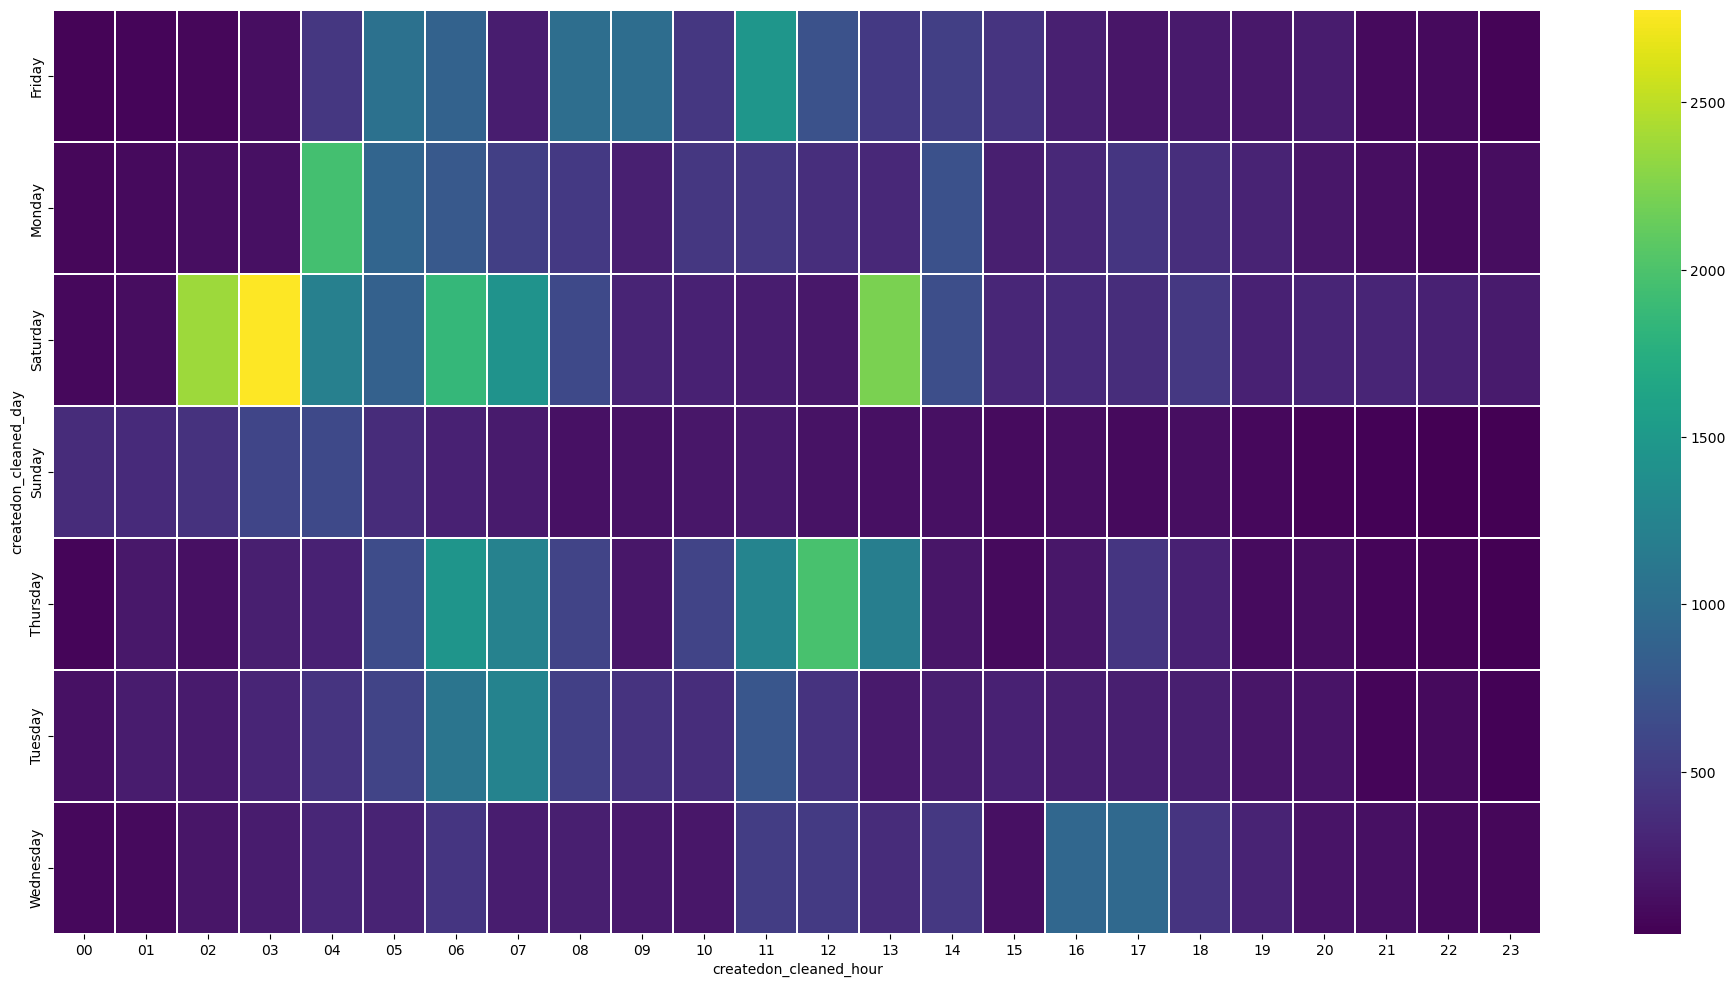

In [27]:
fig, axes = plt.subplots(figsize=(24,12))
sns.heatmap(table,cmap='viridis',linewidths=0.1)

In [28]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

def analyze_slot_availability(data):

    daily_grouped = data.groupby('createdon_cleaned_day').agg(
        total_slots_checked=('user_id', 'size'),
        total_available_slots=('slots_yes', 'sum')
    )
    daily_grouped['average_daily_availability_percentage'] = \
        daily_grouped['total_available_slots'] / daily_grouped['total_slots_checked'] * 100
    daily_grouped['slots_checked_to_available_ratio'] = \
        daily_grouped['total_slots_checked'] / daily_grouped['total_available_slots']

    weekly_grouped = data.groupby(['createdon_cleaned_week','createdon_cleaned_month']).agg(
        total_slots_checked=('user_id', 'size'),
        total_available_slots=('slots_yes', 'sum')
    )
    weekly_grouped['average_weekly_availability_percentage'] = \
        weekly_grouped['total_available_slots'] / weekly_grouped['total_slots_checked'] * 100
    weekly_grouped['slots_checked_to_available_ratio'] = \
        weekly_grouped['total_slots_checked'] / weekly_grouped['total_available_slots']
    
    hourly_grouped = data.groupby('createdon_cleaned_hour').agg(
        total_slots_checked=('user_id', 'size'),
        total_available_slots=('slots_yes', 'sum')
    )
    hourly_grouped['average_hourly_availability_percentage'] = \
        hourly_grouped['total_available_slots'] / hourly_grouped['total_slots_checked'] * 100
    hourly_grouped['slots_checked_to_available_ratio'] = \
        hourly_grouped['total_slots_checked'] / hourly_grouped['total_available_slots']
    
    location_grouped = data.groupby('slot_location').agg(
        total_slots_checked=('user_id', 'size'),
        total_available_slots=('slots_yes', 'sum')
    )
    location_grouped['average_location_availability_percentage'] = \
        location_grouped['total_available_slots'] / location_grouped['total_slots_checked'] * 100
    location_grouped['slots_checked_to_available_ratio'] = \
        location_grouped['total_slots_checked'] / location_grouped['total_available_slots']

    return daily_grouped, weekly_grouped, hourly_grouped, location_grouped

daily_data, weekly_data, hourly_data, location_data = analyze_slot_availability(df)

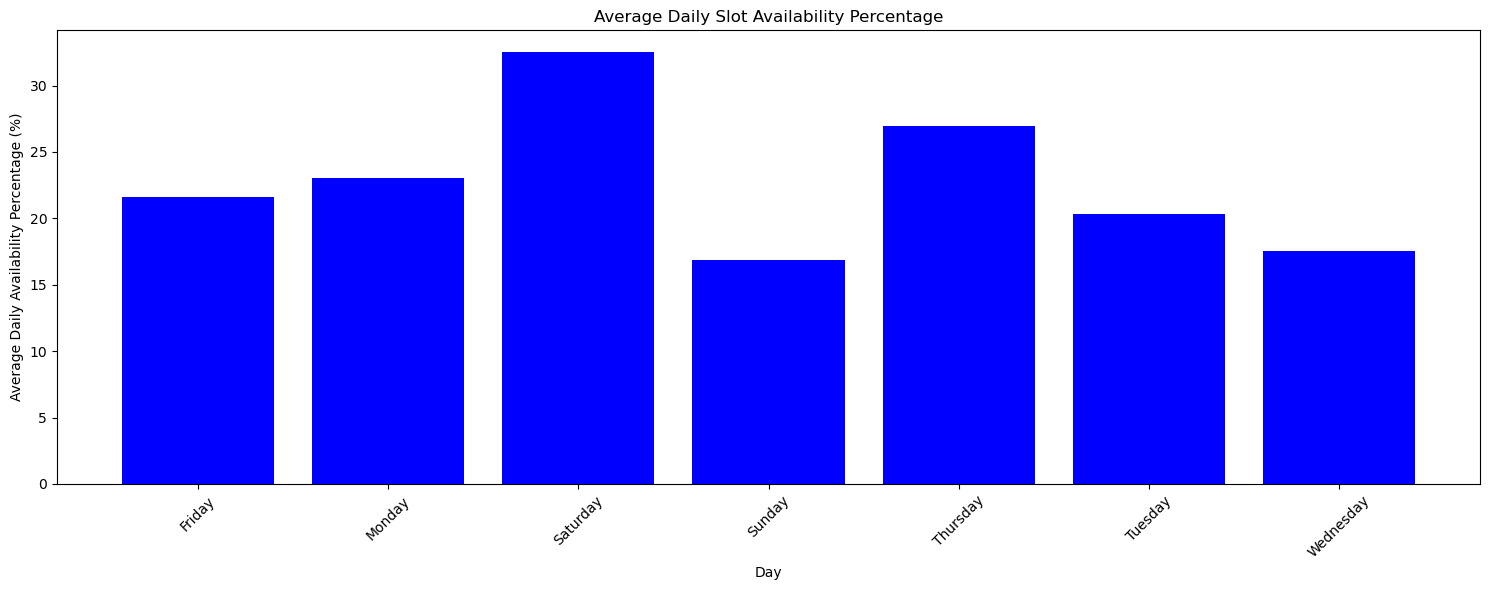

In [29]:
plt.figure(figsize=(15, 6))
plt.bar(daily_data.index, daily_data['average_daily_availability_percentage'], color='blue')
plt.xlabel('Day')
plt.ylabel('Average Daily Availability Percentage (%)')
plt.title('Average Daily Slot Availability Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

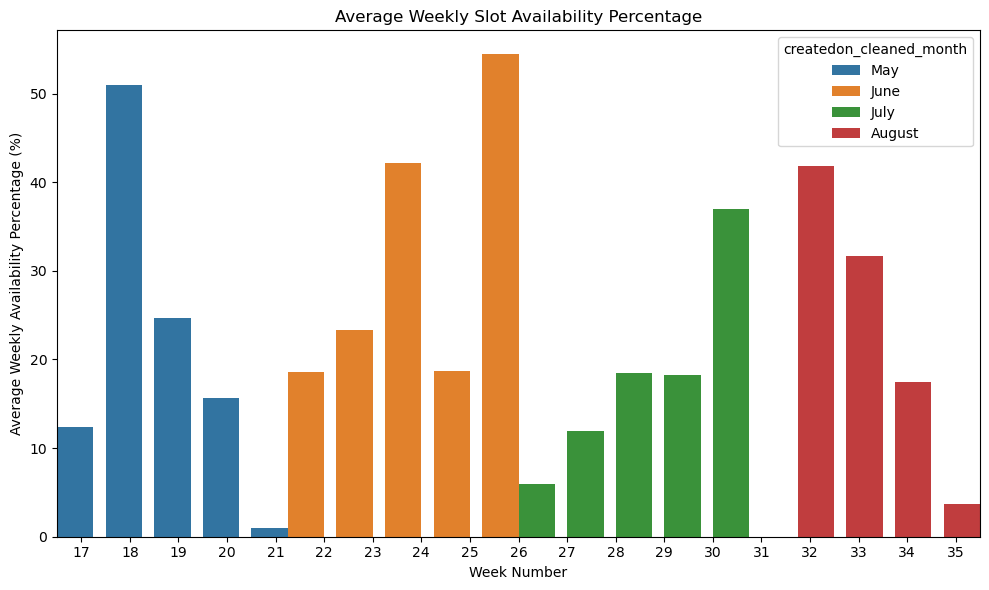

In [30]:
weekly_data_reset = weekly_data.reset_index(level='createdon_cleaned_month')
colors = {'May': 'blue', 'June': 'orange','July':'green','August':'green'}
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_data_reset.index, y='average_weekly_availability_percentage', hue='createdon_cleaned_month',
            data=weekly_data_reset, width=3)
plt.xlabel('Week Number')
plt.ylabel('Average Weekly Availability Percentage (%)')
plt.title('Average Weekly Slot Availability Percentage')
plt.tight_layout()
plt.show()

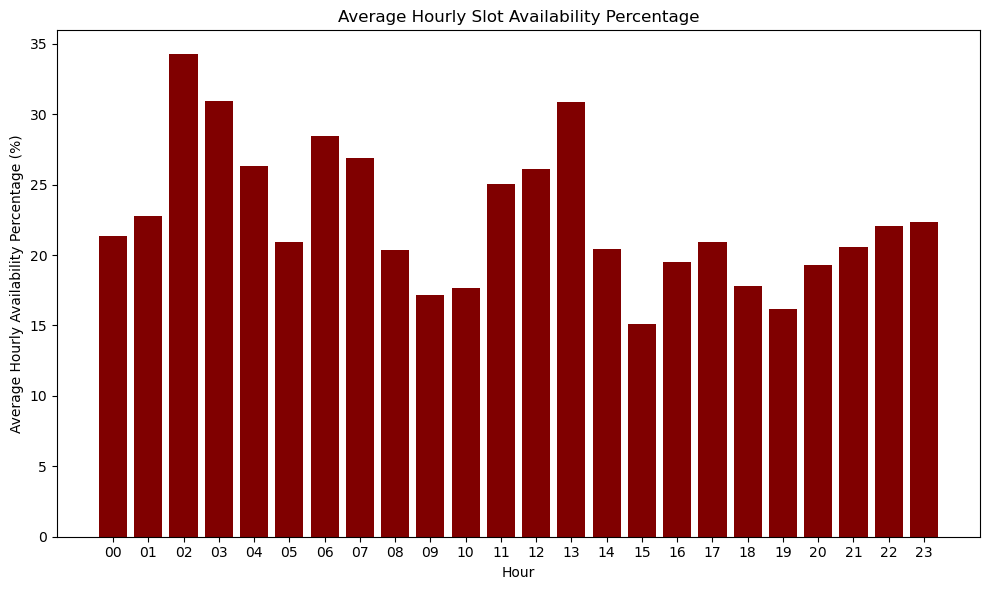

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_data.index, hourly_data['average_hourly_availability_percentage'], color='maroon')
plt.xlabel('Hour')
plt.ylabel('Average Hourly Availability Percentage (%)')
plt.title('Average Hourly Slot Availability Percentage')
plt.tight_layout()
plt.show()

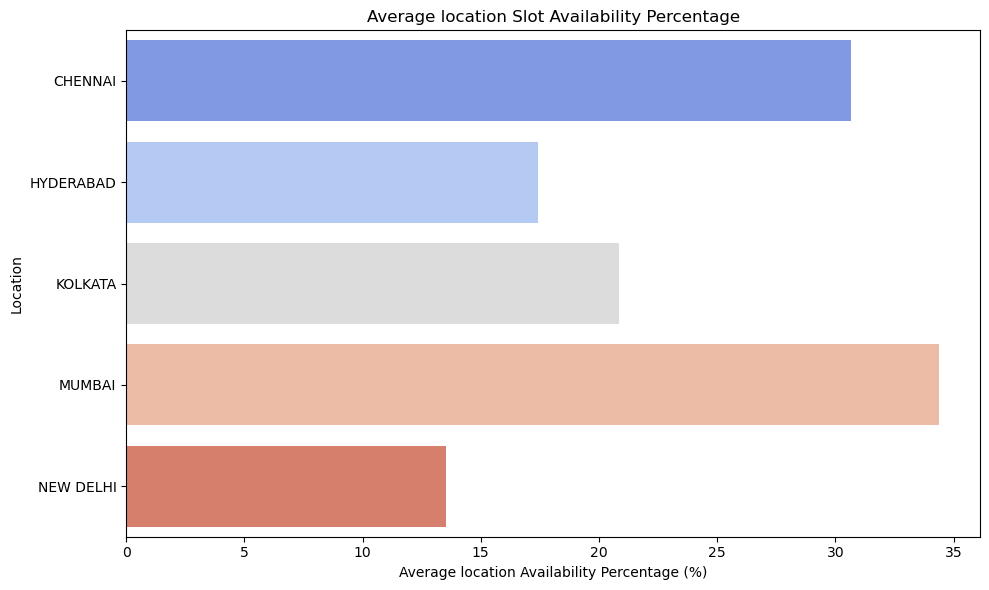

In [33]:
location_data_cleaned = location_data[location_data.index != 'English']

plt.figure(figsize=(10, 6))
sns.barplot(y=location_data_cleaned.index, x=location_data_cleaned['average_location_availability_percentage'], palette='coolwarm')
plt.ylabel('Location')
plt.xlabel('Average location Availability Percentage (%)')
plt.title('Average location Slot Availability Percentage')
plt.tight_layout()
plt.show()

# Logistic regression 

In [34]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [35]:
fraction_train = 0.7
df_train, df_test = train_test_split(df, test_size=(1 - fraction_train), stratify = df['slots_yes'], random_state = 42)

In [36]:
logit_reg = smf.logit("slots_yes ~ slot_location + createdon_cleaned_hour + createdon_cleaned_day + createdon_cleaned_week", data=df_train)
logit_reg_results = logit_reg.fit()
print(logit_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.468837
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              slots_yes   No. Observations:               211230
Model:                          Logit   Df Residuals:                   211177
Method:                           MLE   Df Model:                           52
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                  0.1375
Time:                        11:48:32   Log-Likelihood:                -99032.
converged:                       True   LL-Null:                   -1.1482e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.9618      0.454   

In [37]:
df_test['predicted_prob'] = logit_reg_results.predict(df_test)
df_test['predicted'] = (df_test['predicted_prob'] > 0.5).astype(int)

In [38]:
y_test = df_test['slots_yes']  
y_pred = df_test['predicted']
y_proba = df_test['predicted_prob']

In [39]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

Accuracy: 0.7775494874513963
Precision: 0.5687261839956451
Recall: 0.19760733875543787
ROC AUC: 0.7583338508553945


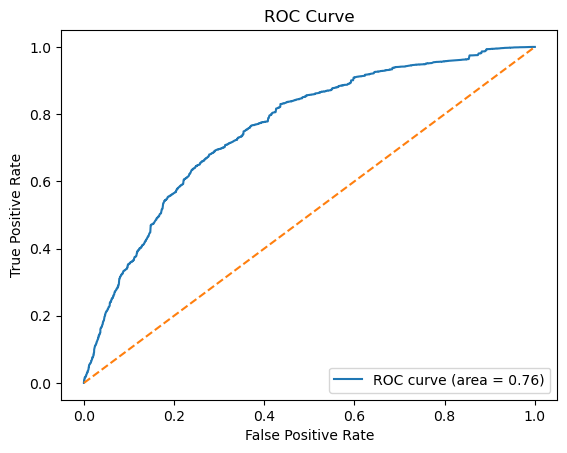

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier

In [41]:
preX = df[['createdon_cleaned_week','slot_location','createdon_cleaned_hour','createdon_cleaned_day']]
X = pd.get_dummies(preX)

y = df['slots_yes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

min_samples_leaf_values = [0.002, 0.005, 0.0075, 0.01]

ctree_models = {}

for min_samples_leaf in min_samples_leaf_values:
    ctree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    ctree.fit(X_train_1, y_train_1)
    y_pred = ctree.predict(X_val)
    y_proba = ctree.predict_proba(X_val)[:, 1]
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    ctree_models[f'ctree_{min_samples_leaf}'] = {'model': ctree, 'accuracy': accuracy, 'roc_auc': roc_auc, 'precision': precision, 'recall': recall}

for model_name, model_info in ctree_models.items():
    print(f"{model_name}: Accuracy = {model_info['accuracy']:.4f}")
    print(f"{model_name}: ROC_AUC = {model_info['roc_auc']:.4f}")
    print(f"{model_name}: Precision = {model_info['precision']:.4f}")
    print(f"{model_name}: recall = {model_info['recall']:.4f}")

ctree_0.002: Accuracy = 0.8454
ctree_0.002: ROC_AUC = 0.8994
ctree_0.002: Precision = 0.7039
ctree_0.002: recall = 0.5837
ctree_0.005: Accuracy = 0.8156
ctree_0.005: ROC_AUC = 0.8464
ctree_0.005: Precision = 0.6573
ctree_0.005: recall = 0.4399
ctree_0.0075: Accuracy = 0.8032
ctree_0.0075: ROC_AUC = 0.8170
ctree_0.0075: Precision = 0.6411
ctree_0.0075: recall = 0.3578
ctree_0.01: Accuracy = 0.7918
ctree_0.01: ROC_AUC = 0.7994
ctree_0.01: Precision = 0.6426
ctree_0.01: recall = 0.2448


In [57]:
min_samples_leaf = 0.002

final_ctree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
final_ctree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=0.002, random_state=42)

In [58]:
y_test_pred = final_ctree.predict(X_test)
y_test_proba = final_ctree.predict_proba(X_test)[:,1]
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test}")
print(f"ROC_AUC on the test set: {roc_auc_test}")
print(f"Precision on the test set: {precision_test}")
print(f"Recall on the test set: {recall_test}")

Accuracy on the test set: 0.8443023153057617
ROC_AUC on the test set: 0.9004673377560161
Precision on the test set: 0.7021032723938334
Recall on the test set: 0.5792982787970493


[Text(0.8822149833502797, 0.9838709677419355, 'slot_location_MUMBAI <= 0.5\ngini = 0.358\nsamples = 211230\nvalue = [161885, 49345]\nclass = Slots_Yes'),
 Text(0.7917421054288831, 0.9516129032258065, 'createdon_cleaned_week_19 <= 0.5\ngini = 0.316\nsamples = 158176\nvalue = [127094, 31082]\nclass = Slots_Yes'),
 Text(0.7123859449618124, 0.9193548387096774, 'slot_location_CHENNAI <= 0.5\ngini = 0.293\nsamples = 150066\nvalue = [123274, 26792]\nclass = Slots_Yes'),
 Text(0.6226223234496364, 0.8870967741935484, 'createdon_cleaned_week_24 <= 0.5\ngini = 0.24\nsamples = 113844\nvalue = [97994, 15850]\nclass = Slots_Yes'),
 Text(0.5608515833154579, 0.8548387096774194, 'createdon_cleaned_week_30 <= 0.5\ngini = 0.223\nsamples = 106651\nvalue = [93041, 13610]\nclass = Slots_Yes'),
 Text(0.5078303342609737, 0.8225806451612904, 'createdon_cleaned_week_31 <= 0.5\ngini = 0.21\nsamples = 101115\nvalue = [89092, 12023]\nclass = Slots_Yes'),
 Text(0.4514988188109646, 0.7903225806451613, 'createdon_cle

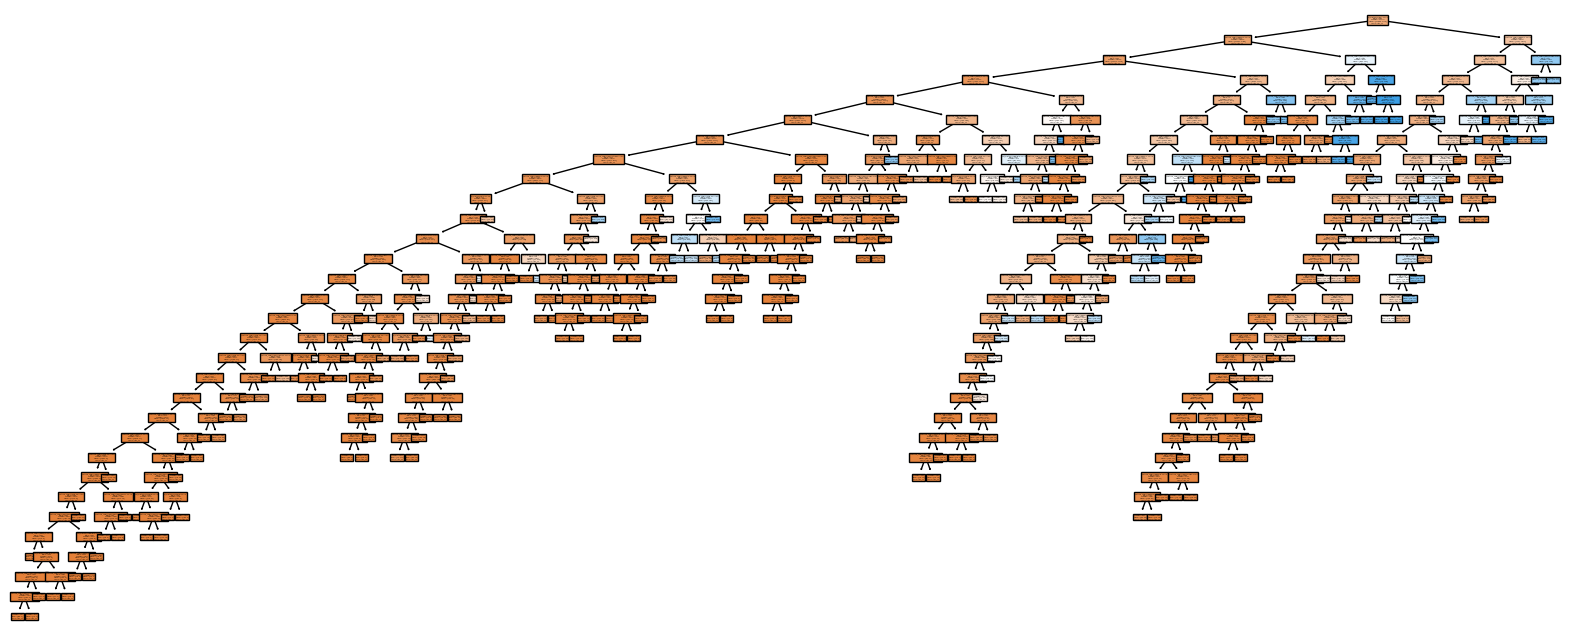

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(final_ctree, feature_names=X.columns.tolist(), class_names=["Slots_Yes","Slots_No"], filled=True)